<a href="https://colab.research.google.com/github/heymshri/Academia/blob/main/creditcardfraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Credit card applications
<p>The fraud of credit card can be defined as someone else uses your account details or your credit card to make the buy something or may be access the cash, that is when u can say u got into credit card fraud. This credit card fraud not only happen online but only in the stores if u don’t eye on the store u go while paying, u might get fraud there as well. Credit card are designed to purchase all your needs you want without having to carry cash in hand. They also provide us different benefits in the form of points while using them in various types of transaction. There are challenges in fraud detection that are what fraud mean is not that easy to acknowledge, the ample bulk of charges aren’t that crooked ,crude of how we explain it , and most of people doesn’t know that impact they face fraud on business. This fraud problem includes modeling of previous transaction of a person with the understanding of the ones that out as a fraud. This project figures out whether a new credit card transaction is fraud or not. This project report contains the literature review, detail explanation of how the detection is done and the concluded with the conclusion of the project.  </p>
<p><img src="https://assets.datacamp.com/production/project_558/img/credit_card.jpg" alt="Credit card being held in hand"></p>


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('/content/creditcard.csv')

In [ ]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 2. Inspecting the applications
<p>The output may appear a bit confusing at its first sight, but let's try to figure out the most important features of a credit card application.  This gives us a pretty good starting point, and we can map these features with respect to the columns in the output.   </p>
<p>As we can see from our first glance at the data, the dataset has a mixture of features. This can be fixed with some preprocessing, but before we do that, let's learn about the dataset a bit more to see if there are other dataset issues that need to be fixed.</p>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.shape 

(284807, 31)

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


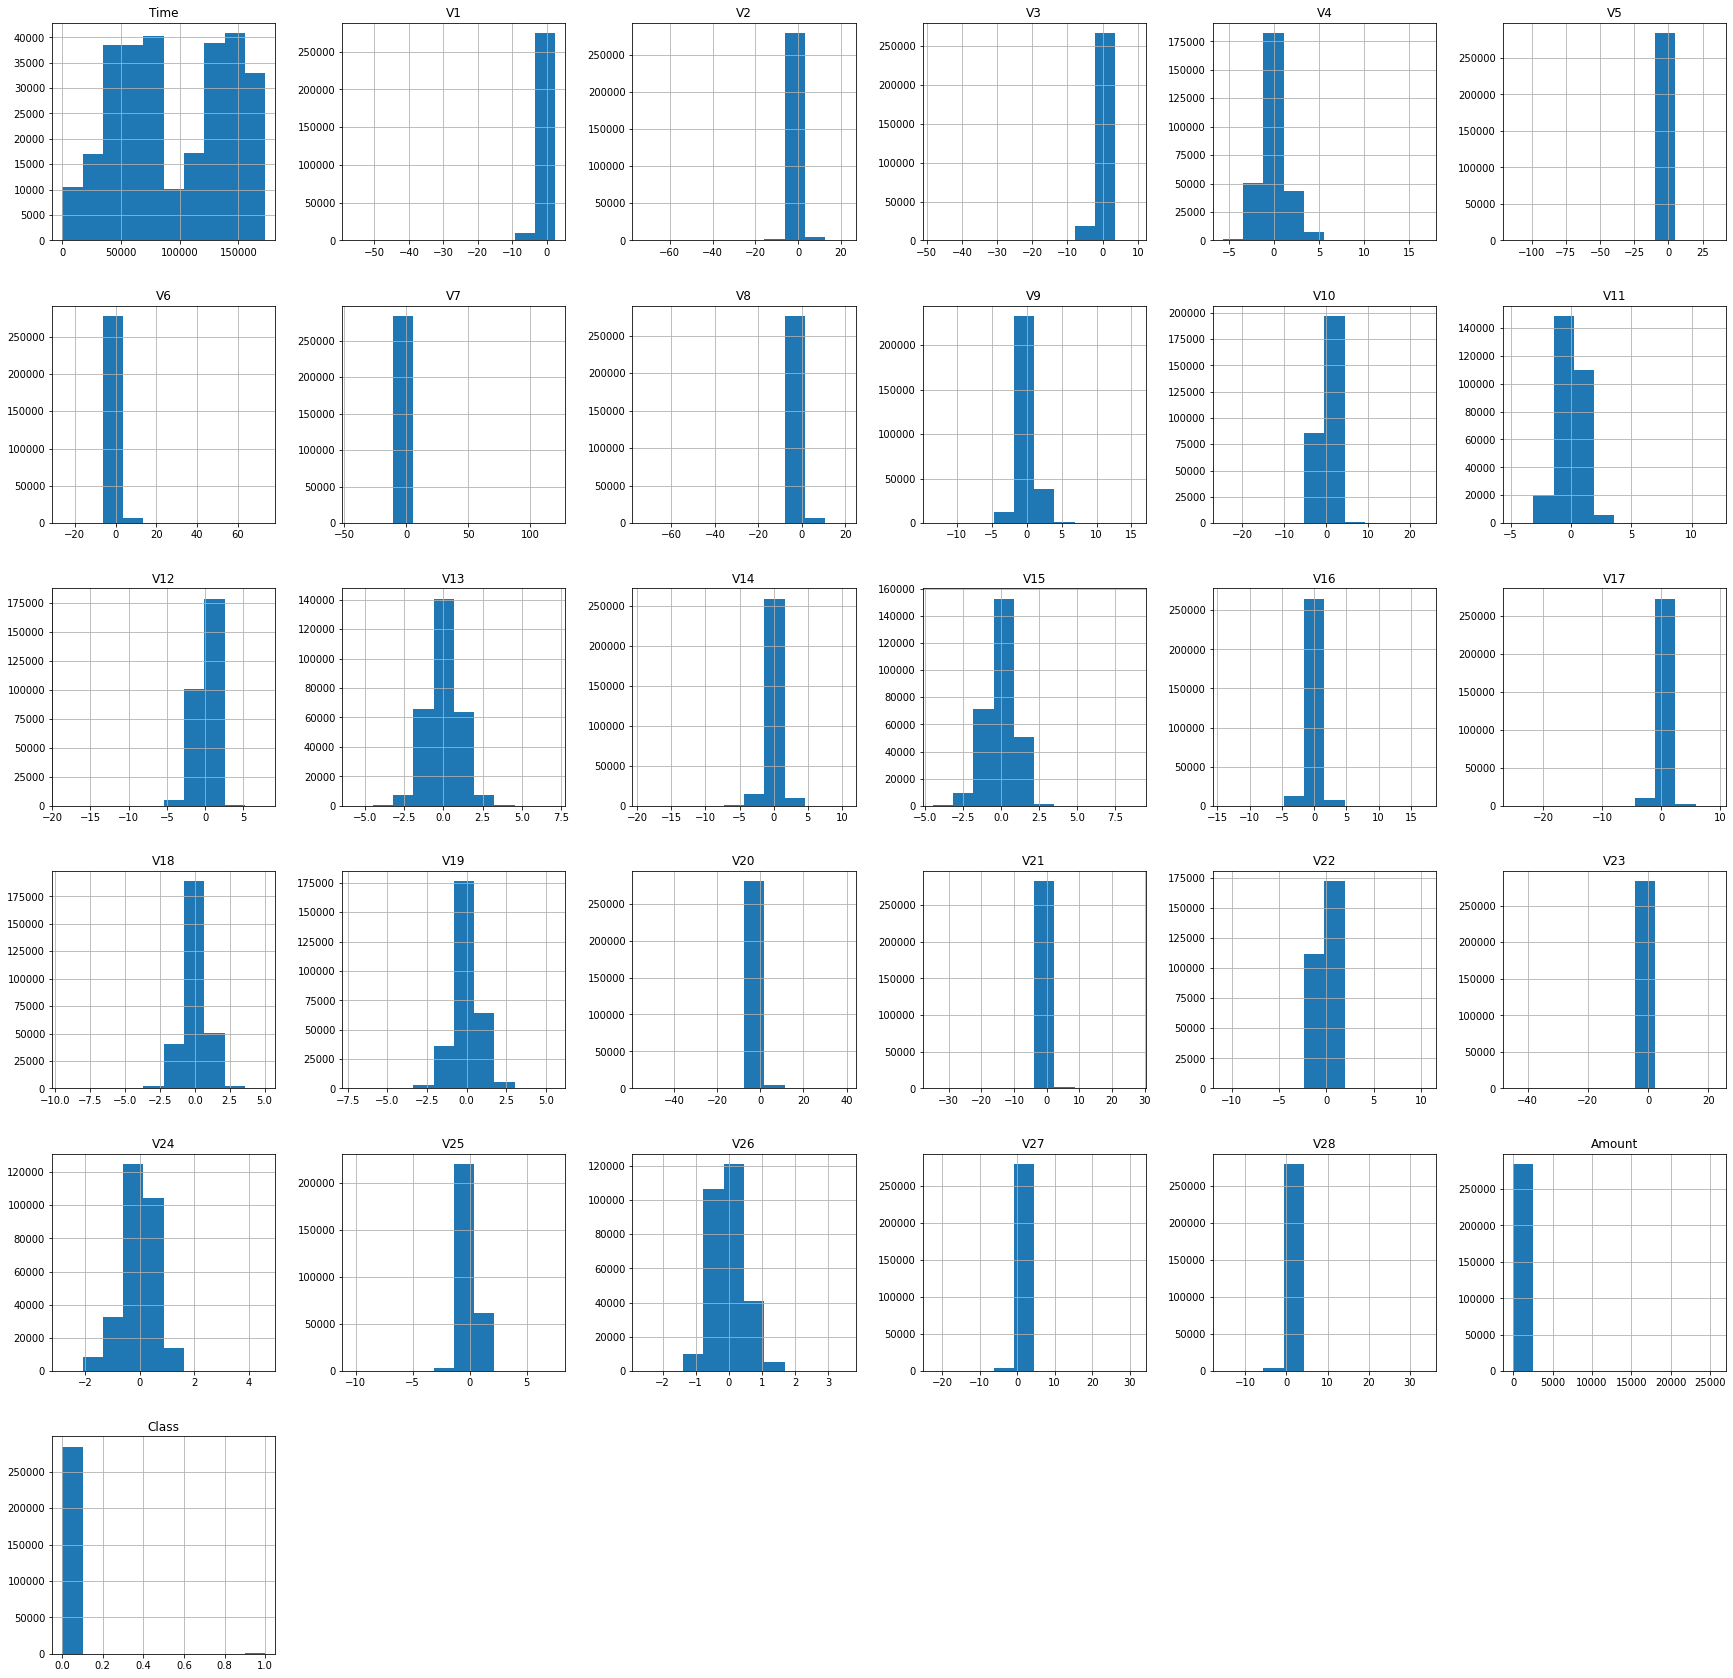

In [ ]:
df.hist(figsize = (30, 30))
plt.show()

## 3. Handling the missing values
<p>Here in our dataset we do not have any missing values so we do not have to fill the NaN in our data.</p>

In [ ]:
df.isnull().sum()

In [ ]:
class_names = {0:'Not Fraud', 1:'Fraud'}
print(df.Class.value_counts().rename(index = class_names))

Not Fraud    284315
Fraud           492
Name: Class, dtype: int64


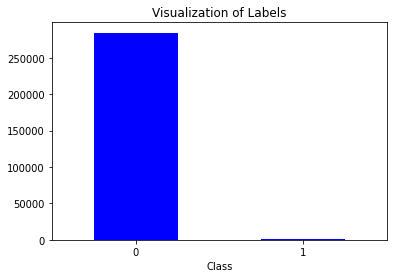

In [ ]:
cnt_cls = df.value_counts(df['Class'], sort=True)
cnt_cls.plot(kind='bar', rot=0, color='b')
plt.title('Visualization of Labels')
plt.show()

Correlation Matrix

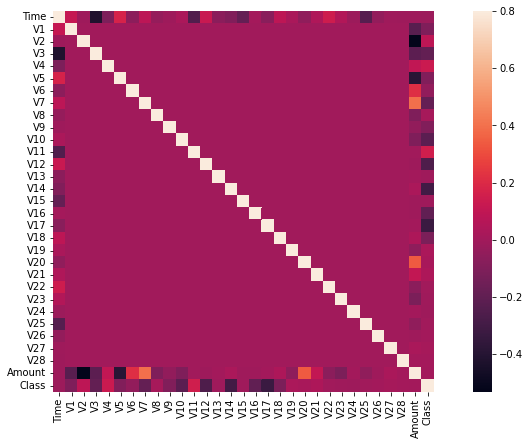

In [ ]:
corrmat = df.corr()
fig = plt.figure(figsize = (14, 7))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

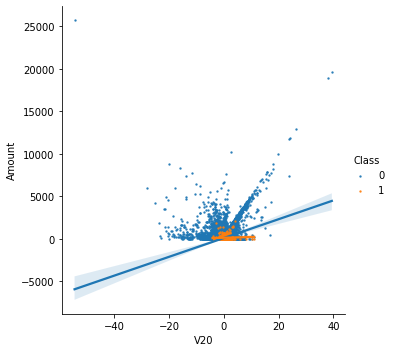

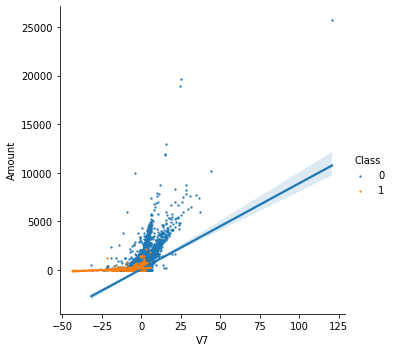

In [ ]:
s = sns.lmplot(x='V20', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V7', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

## 6. Preprocessing the data


<p>As in this project we do not have the missing values we can move forward.</p>
<p>There is still some minor but essential data preprocessing needed before we proceed towards building our machine learning model. We are going to divide these remaining preprocessing steps into three main tasks:</p>
<ol>
<li>Convert the non-numeric data into numeric.</li>
<li>Split the data into train and test sets. </li>
<li>Scale the feature values to a uniform range.</li>
</ol>
<p>First, we will be converting all the non-numeric values into numeric ones if there are any. We need to do this to get faster computation result and also machine learning models compute in numeric format.</p>

As our data is imbalanced we try using data to fix

In [ ]:
X = df.drop(columns=['Class'])
Y = df['Class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print('X-train: ', X_train.shape)
print('X-test: ', X_test.shape)

X-train:  (227845, 30)
X-test:  (56962, 30)


## 7. Splitting the dataset into train and test sets
<p>We have successfully converted all the non-numeric values to numeric ones.</p>
<p>Now, we will split our data into train set and test set to prepare our data for two different phases of machine learning modeling: training and testing. Ideally, no information from the test data should be used to scale the training data or should be used to direct the training process of a machine learning model. Hence, we first split the data and then apply the scaling.</p>


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score, f1_score, accuracy_score, confusion_matrix, recall_score, precision_recall_curve
def metrics(actuals, predictions):
    print('Accuracy: ', np.round(accuracy_score(actuals, predictions), decimals=5))
    print('Precision: ', np.round(precision_score(actuals, predictions), decimals=5))
    print('Recall: ', np.round(recall_score(actuals, predictions), decimals=5))    
    print('F1-score ', np.round(f1_score(actuals, predictions), decimals=5))  

Text(33.0, 0.5, 'Actual Label')

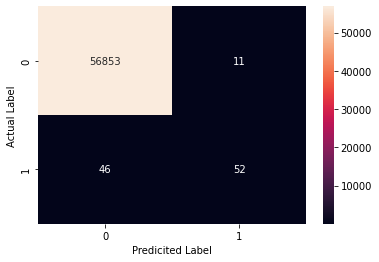

In [ ]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, Y_train)
ypred = logreg.predict(X_test)
cm = confusion_matrix(Y_test, ypred)

sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicited Label')
plt.ylabel('Actual Label')


In [ ]:
from imblearn.over_sampling import SMOTE
print("Before OverSampling")
print("label '1': ", sum(Y_train==1))
print("label '0': ", sum(Y_train==0))

Before OverSampling
label '1':  394
label '0':  227451


In [ ]:
sm = SMOTE(random_state=3)
xtrain, ytrain = sm.fit_resample(X_train, Y_train)

print("After OverSampling") 
print("X-train: ", xtrain.shape)
print("Y-train: ", ytrain.shape)

print("label '1': ", sum(ytrain==1))
print("label '0': ", sum(ytrain==0))

After OverSampling
X-train:  (454902, 30)
Y-train:  (454902,)
label '1':  227451
label '0':  227451


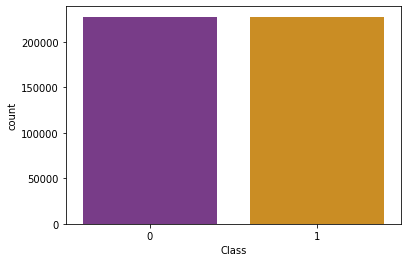

In [ ]:
sns.countplot(x=ytrain, data=df, palette='CMRmap')


## 9. Fitting a logistic regression model and Random Forest to the train set
<p>Essentially, predicting if a credit card application will be approved or not is a classification task. According to UCI, our dataset contains more instances that correspond to "Denied" status than instances corresponding to "Approved" status.</p>
<p>This gives us a benchmark. A good machine learning model should be able to accurately predict the status of the applications with respect to these statistics.</p>


In [ ]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

## 10. Making predictions and evaluating performance
<p>We are using Logestic Regression Model and Random Forest Model for prediction and evaluation.</p>

In [ ]:
yprediction = logreg.predict(X_test)
cm = confusion_matrix(Y_test, yprediction)
metrics(Y_test, yprediction)
logscore = np.round(f1_score(Y_test, yprediction),decimals=4)

Accuracy:  0.999
Precision:  0.8254
Recall:  0.53061
F1-score  0.64596


In [ ]:
yprediction = rf.predict(X_test)
cm = confusion_matrix(Y_test, yprediction)
metrics(Y_test, yprediction)
ranscore = np.round(f1_score(Y_test, yprediction),decimals=4)

Accuracy:  0.99954
Precision:  0.96154
Recall:  0.76531
F1-score  0.85227


## 11. Grid searching and making the model perform better
<p>Our model was pretty good! It was able to yield an accuracy score of almost 100%.</p>
<p>In the confusion matrix, the 1st element of the of the 1st row of the confusion matrix denotes the true negatives and the last element of the 2nd row of the confusion matrix denotes the true positives meaning the number of positive instances predicted by the model correctly.</p>


Text(0.5, 1.0, 'Confusion Matrix')

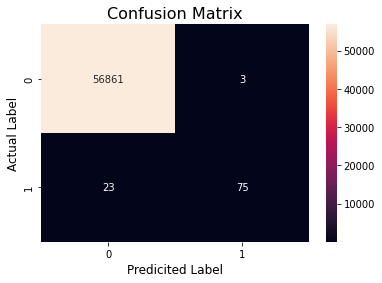

In [ ]:
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicited Label',fontsize=12)
plt.ylabel('Actual Label',fontsize=12)
plt.title('Confusion Matrix',fontsize=16)

Text(0.5, 1.0, 'Precision Recall Curve')

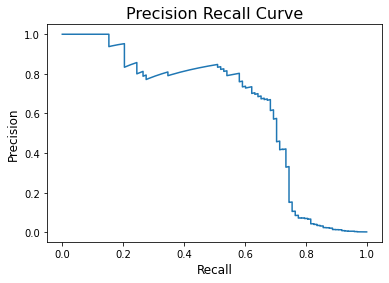

In [ ]:
ypredict = logreg.predict_proba(X_test)[:,-1]
precision, recall, thresholds = precision_recall_curve(Y_test, ypredict)
plt.plot(recall, precision)
plt.xlabel('Recall',fontsize=12)
plt.ylabel('Precision',fontsize=12)
plt.title('Precision Recall Curve',fontsize=16)

Text(0.5, 1.0, 'Precision Recall Curve')

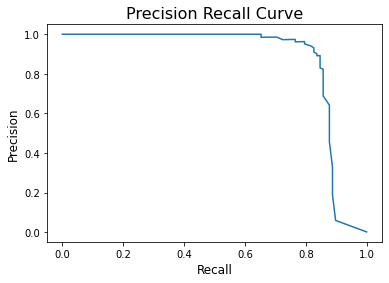

In [ ]:
ypredict = rf.predict_proba(X_test)[:,-1]
precision, recall, thresholds = precision_recall_curve(Y_test, ypredict)
plt.plot(recall, precision)
plt.xlabel('Recall',fontsize=12)
plt.ylabel('Precision',fontsize=12)
plt.title('Precision Recall Curve',fontsize=16)

## 12. Finding the best performing model
<p>Here we have compared the two model Logistic Regression Model and Random Forest Model in terms of F1-score. </p>

[0.8523, 0.646]


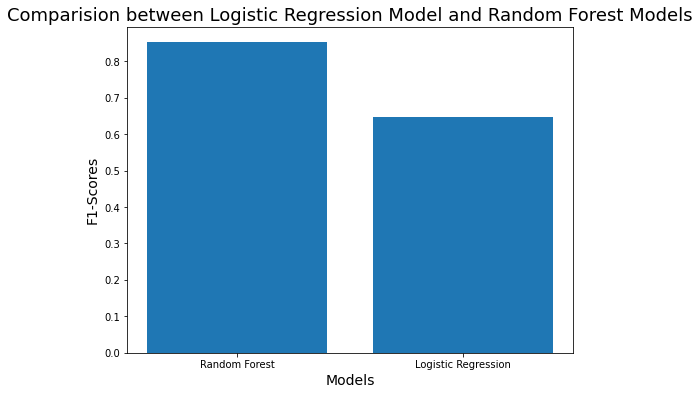

In [ ]:
modtitle = ['Random Forest', 'Logistic Regression']
output = [ranscore, logscore]
print(output)
plt.figure(figsize=(8, 6))
plt.bar(modtitle, output)
plt.title('Comparision between Logistic Regression Model and Random Forest Models', fontsize=18)
plt.xlabel('Models',fontsize=14)
plt.ylabel('F1-Scores',fontsize=14)
plt.show()

#Conclusion
<p>We have used two model Logestic Regression Model and Radom Forest Model. here we can see comparing tehse two model the F1-Score of Random Forest Model is 86% and Logestion Regression model is 64%. So, we can say that the Random Forest has better accuracy than Logestic Regression Model</p>